In [1]:
import cv2
import torch
import matplotlib.pyplot as plt
import sys
sys.path.append("segment-anything")
from segment_anything import SamPredictor, sam_model_registry

In [2]:
sam = sam_model_registry['vit_b'](checkpoint='sam_vit_b_01ec64.pth')
predictor = SamPredictor(sam)

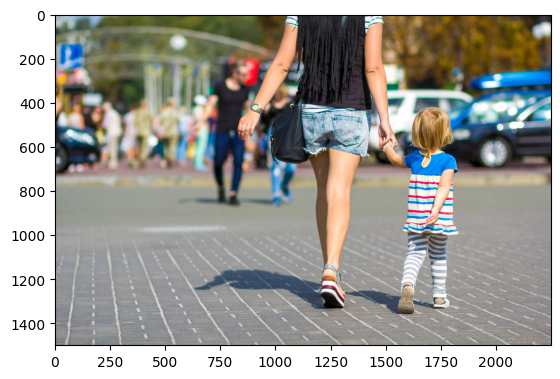

In [3]:
img = cv2.imread('/pfs/work7/workspace/scratch/ul_xto11-FSSAM/sa1b/train/sa_280803.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [4]:
res = predictor.set_image(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


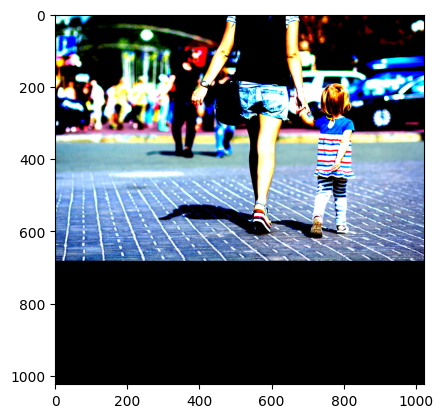

In [5]:
plt.imshow(res.squeeze(0).permute(1, 2, 0))
plt.show()

torch.Size([1, 256, 64, 64])


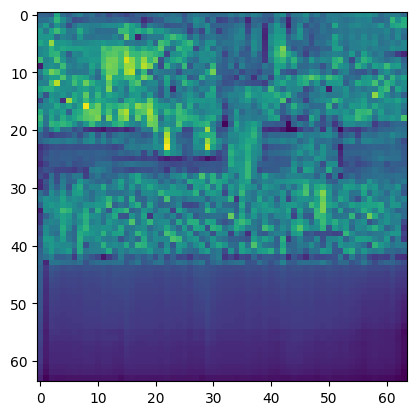

In [6]:
print(predictor.features.shape)
plt.imshow(predictor.features.squeeze(0).permute(1, 2, 0).mean(-1))
plt.show()

In [7]:
#points = torch.tensor([[600, 400], [600, 100]])
points = torch.tensor([[600, 400]])
print(points.shape)
sparse_embeddings, dense_embeddings = sam.prompt_encoder(
  points=(points.unsqueeze(0), torch.ones(1, len(points))),
  boxes=None,
  masks=None
)
print(sparse_embeddings.shape)
print(dense_embeddings.shape)

torch.Size([1, 2])
torch.Size([1, 2, 256])
torch.Size([1, 256, 64, 64])


In [8]:
masks, iou_predictions, upscaled_embedding = sam.mask_decoder(
  image_embeddings=predictor.features,
  image_pe=sam.prompt_encoder.get_dense_pe(),
  sparse_prompt_embeddings=sparse_embeddings,
  dense_prompt_embeddings=dense_embeddings,
  multimask_output=True,
)

iou_token and mask_token torch.Size([1, 256]) torch.Size([4, 256])
output_tokens torch.Size([5, 256])
tokens torch.Size([1, 7, 256])
image_embeddings torch.Size([1, 256, 64, 64])
pos_src torch.Size([1, 256, 64, 64])
self-attention torch.Size([1, 7, 256])
token to image attention torch.Size([1, 7, 256])
MLP torch.Size([1, 7, 256])
image to token attention torch.Size([1, 7, 256])
self-attention torch.Size([1, 7, 256])
token to image attention torch.Size([1, 7, 256])
MLP torch.Size([1, 7, 256])
image to token attention torch.Size([1, 7, 256])
hyper_in torch.Size([1, 4, 32])


torch.Size([1, 32, 256, 256])


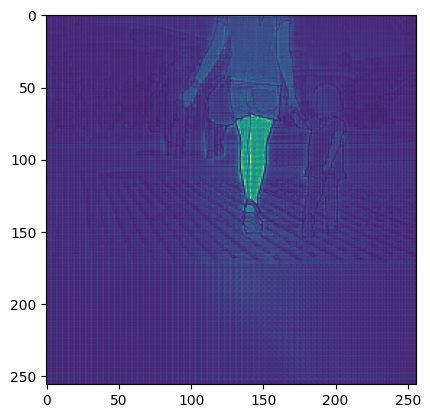

In [9]:
print(upscaled_embedding.shape)
plt.imshow(upscaled_embedding.squeeze(0).detach().mean(0))
plt.show()

torch.Size([1, 3, 256, 256])
torch.Size([1, 3])
tensor([[0.9364, 0.8424, 0.9846]])


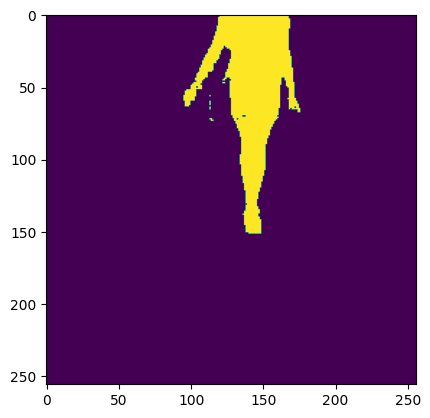

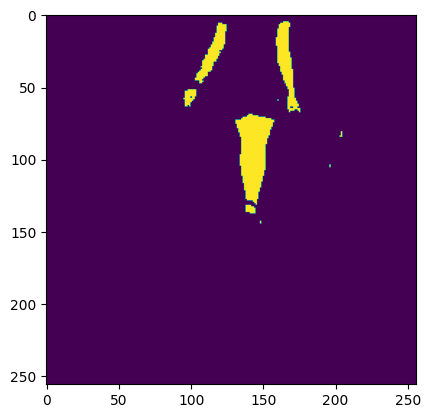

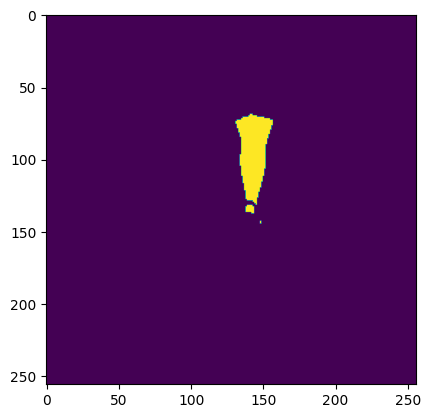

In [11]:
print(masks.shape)
print(iou_predictions.shape)
print(iou_predictions.detach())
for i in range(3):
    plt.imshow(masks.squeeze(0).detach()[i] > 0)
    plt.show()